In [ ]:
!pip install tensor-sensor[torch]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tsensor
from transformers import pipeline
from matplotlib import pyplot as plt

In [ ]:
%config InlineBackend.figure_format='retina'

# Tareas pre-entrenadas en Hugging 🤗 Face
- Pipelines disponibles: https://huggingface.co/transformers/main_classes/pipelines.html
- Modelos pre-entrenados: https://huggingface.co/transformers/pretrained_models.html

## Tarea: rellenar huecos (`fill-mask`)
Es una tarea que se puede entrenar de forma no supervisada: durante el entrenamiento se le pasa a la red un texto escondiéndole palabras (por defecto con p=0.15), y se le pide a la red que prediga las palabras enmascaradas. Para predecir las palabras enmascaradas, el modelo puede ver **todo** el texto, tanto el anterior a la palabra oculta como el posterior.

Al modelo entrenado con esta tarea se le llama _Masked Language Model_ (MLM). 

Además de la tarea MLM, a algunos modelos, como BERT, se les entrena simultáneamente para predecir si dos fragmentos de texto son consecutivos o no _(Next Sentence Prediction)_ o NSP.

Ejemplos de arquitecturas diseñadas para esta tarea: BERT, RoBERTa, DeBERTA, XLNet, etc.

Paper de BERT: https://arxiv.org/pdf/1810.04805.pdf


Diferencias BERT vs RoBERTa:
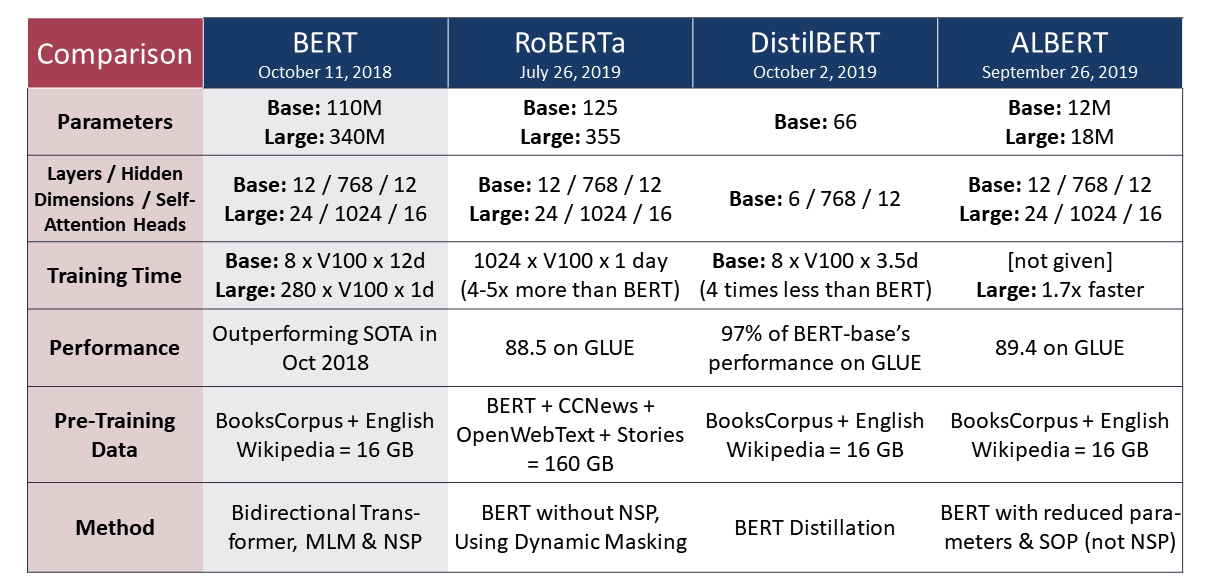

GLUE: ¿qué es GLUE? ¿Cómo se evalúan los modelos de lenguaje? https://mccormickml.com/2019/11/05/GLUE/

In [ ]:
unmasker = pipeline("fill-mask", model="roberta-base")

In [ ]:
unmasker.tokenizer.mask_token

In [ ]:
unmasker("I don't like ball sports, I prefer <mask>")

In [ ]:
unmasker("I don't like <mask> sports, I prefer swimming")

In [ ]:
unmasker("It's late so I'm going to <mask>")

## Tarea: generación de texto (`text-generation`)
En este caso el modelo se entrena pasándole un texto y se le pide que prediga la siguiente palabras. También se entrenar de forma no supervisada (no hay nada que etiquetar). A diferencia del modelo MLM, los modelos generativos solo pueden ver el texto que antecede a la palabra a predecir, por ello también a veces se les llama modelos **autoregresivos** o **causales**.

Ejemplos de modelos: todos los GPT.

In [ ]:
generator = pipeline(
    'text-generation', 
    #model='EleutherAI/gpt-neo-2.7B', # mejores resultados pero no cabe en la RAM de kaggle
    #model='EleutherAI/gpt-neo-1.3B',
    model='gpt2', # 117M parámetros
    device=0,
)

In [ ]:
generator('Once upon a time there was a little girl named Little Red Riding Hood.')

In [ ]:
generator("I don't like ball sports, I prefer")

In [ ]:
generator("I don't like ball sports, I prefer", 
    max_length = 12,
    num_return_sequences=5,
)

In [ ]:
generator("In a place of La Mancha, whose name I don't want to remember")

## Tarea: preguntas y respuestas (`question-answering`)

Le pasamos un texto y una pregunta y nos devuelve el fragmento del texto que mejor responde a la pregunta. Ejemplo:

https://twitter.com/info_libertas/status/1393321710368198662



En hugging face hay modelos entrenados con el dataset SQUAD 2.0: https://rajpurkar.github.io/SQuAD-explorer/, que contiene 100 000 preguntas con sus respuestas y 50 000 ejemplos adversarios de preguntas sin respuestas cuya finalidad es dar la opción al modelo de no responder si no sabe la respuesta.

In [ ]:
qa = pipeline(
    "question-answering", 
    'bert-large-uncased-whole-word-masking-finetuned-squad',
    device=0
)

In [ ]:
text_en = r"""
The respiratory system is made up of the airways and the lungs.

The airways are a set of tubes through which air enters and leaves. 
They are the nostrils, pharynx, trachea and bronchial tubes. 
The latter branch out into increasingly thin tubes until they end up 
in millions of tiny sacs called alveoli.

The lungs are two organs formed by the branches of the bronchial 
tubes and by the alveoli.

This is how our respiratory system works:

The process of respiration consists of introducing air into the lungs, 
exchanging oxygen and carbon dioxide with the blood, and expelling air outside.

The entry of air into the lungs; The inspiration:

Beneath the lungs is a muscle called the diaphragm. When this muscle 
contracts, it widens the lungs and air enters through the airways to 
the alveoli.

The exchange of oxygen and carbon dioxide:

In the alveoli, oxygen from the air passes into the blood. 

At the same time, the carbon dioxide that we produce as waste and that 
is in the blood passes into the alveolus.

The expulsion of air to the outside; expiration:

The diaphragm relaxes, the lungs narrow, and the carbon dioxide-laden air
from the alveoli is pushed out through the airways.
"""

questions_en = [
    #"Name in an orderly manner the different airways that carbon dioxide-rich air passes through from the moment it leaves the alveolus until it is expelled outside.",
    "What are the airways that carbon dioxide-rich air passes through from the moment it leaves the alveolus until it is expelled outside in an orderly manner?",
    "Explain how gas exchange occurs between air and blood during respiration.",
    "What are the alveoli?",
    "Explain what role the diaphragm plays during inspiration.",
    "Explain what role the diaphragm plays during exhalation.",
]


In [ ]:
qa(context=text_en, question=questions_en[4])

# Ejercicios
* Probar alguno de los otros pipelines disponibles en https://huggingface.co/transformers/main_classes/pipelines.html, por ejemplo:
    * `SummarizationPipeline` (para resumir textos)
    * `ConversationalPipeline`
    * `TextClassificationPipeline` (análisis de sentimientos)
* [Buscar](https://huggingface.co/models?filter=es&pipeline_tag=question-answering) algún modelo de preguntas y respuestas pre-entrenado en **castellano** y hacer la prueba con el texto y las pregutnas en castellano (ver más abajo)
* Test de Turing (para hacer en parejas): ¿puedes discriminar texto sintético generado por ordenador del texto escrito por un humano? Una persona escoge un fragmento de texto, genera su continuación con GPT-x (cuanto más grande el modelo, mejor será el resultado) y le pasa a la otra: 1) el texto original, 2) la continuación original, 3) la continuación generada por GPT y debe intentar diferenciar el texto original del sintético.

In [ ]:
text_es = r"""
El aparato respiratorio está formado por las vías respiratorias y por los pulmones.

Las vías respiratorias son un conjunto de tubos por los que el aire entra y sale. Son las fosas nasales, la faringe, la traquea y los bronquis. Estos últimos se ramifican en tubos cada vez más finos hasta acabar en millones de diminutos sacos llamados alvéolos.

Los pulmones son dos órganos formados por las ramificaciones de los bronquios y por los alvéolos.

Así funciona nuestro aparato respiratorio:

El proceso de la respiración consiste en introducir aire en los pulmones, intercambiar oxígeno y dióxido de carbono con la sangre y expulsar aire al exterior.

La entrada de aire en los pulmones; la inspiración:

Bajo los pulmones hay un músculo llamado diafragma. Cuando este músculo se contrae, ensancha los pulmones y el aire entra por las vías respiratorias hasta los alvéolos.

El intercabio de oxígeo y dióxido de carbono:

En los alvéolos, el oxígeno del aire pasa a la sangre. Al mismo tiempo, el dióxido de carbono que producimos como desencho y que está en la sange pasa al alvéolo.

La expulsión del aire al exterior; la espiración:

El diafragma se relaja, los pulmones se estrechan y el aire cargado de dióxido de carbono de los alvéolos se expulsa al exterior a traves de las vías respiratorias.
"""

questions_es = [
    "Nombra de manera ordenada las diferentes vías respiratorias que atraviesa el aire rico en dióxido de carbono desde que sale del alvéolo hasta que es expulsado al exterior.",
    "Explica cómo se produce el intercambio de gases entre el aire y la sangre durante la respiración.",
    "¿Qué son los alvéolos?",
    "Explica que papel desempeña el diafragma durante la inspiración.",
    "Explica qué papel desempeña el diafragma durante la espiración.",
]

# Los modelos por dentro

## El tokenizador

In [ ]:
unmasker.tokenizer

In [ ]:
unmasker.tokenizer.mask_token

In [ ]:
tokens = unmasker.tokenizer.encode("It's late so I'm going to <mask>")
tokens

In [ ]:
unmasker.tokenizer.decode(tokens)

In [ ]:
import torch

In [ ]:
x = torch.LongTensor(tokens) # convertimos a tensor
x = x.reshape(1, -1) # le añadimos la dimensión del batch
x

In [ ]:
with tsensor.explain(fontname='Ubuntu Mono'): 
    x

## El modelo

In [ ]:
unmasker.model

## Entrada al modelo: los embeddings
Los embeddings ([nn.Embedding](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)) traducen una variable categórica (ej. el `id` de una palabra) a un vector continuo. La traducción consiste sencillamente en indexar con el `id` de cada palabra en una matriz de dimensiones `n` x `d` donde `n` es el número de palabras del vocabulario y `d` es la dimensión de vector.

In [ ]:
embs = unmasker.model.roberta.embeddings(x)
embs

In [ ]:
with tsensor.explain(fontname='Ubuntu Mono'):
    embs

El resultado de `unmasker.model.roberta.embeddings` codifica no solo las palabras sino la posición:

In [ ]:
tokens = unmasker.tokenizer.encode("The dog ate the cat")
embs = unmasker.model.roberta.embeddings(torch.LongTensor(tokens).unsqueeze(0))
embs # <s>, The, dog, ..., the, cat, </s>

In [ ]:
tokens = unmasker.tokenizer.encode("The cat ate the dog")
embs = unmasker.model.roberta.embeddings(torch.LongTensor(tokens).unsqueeze(0))
embs # <s>, The, cat, ..., the, dog, </s>

La matriz de embeddings es un **parámetro** del modelo, por lo que sus valores no están predefinidos (se inicializan de forma aleatoria) sino que se aprenden durante el entrenamiento en función de la tarea. Para un modelo MLM, podemos conjeturar que los embeddings almacenan información sobre:

* Significados
* Funciones sintácticas de la palabra (sustantivo, adverbio, preposición, etc.)
* Tiempo verbal
* Género
* Número
* etc.

En el siguiente ejemplo podemos ver como, de todas las palabras de la frase, la palabra `cat` guarda mayor relación con `dog`.

Vamos a sacar los embeddings de las palabras (sin la codificación posicional):

In [ ]:
embs = unmasker.model.roberta.embeddings.word_embeddings(torch.LongTensor(tokens).unsqueeze(0))
embs # <s>, The, cat, ..., the, dog, </s>

In [ ]:
words = [ unmasker.tokenizer.decode(token) for token in tokens ]
words

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
corr = torch.matmul(embs[0], embs[0].T).detach().numpy()
im = plt.imshow(corr)
ax.set_xticks(np.arange(len(words)))
ax.set_yticks(np.arange(len(words)))
ax.set_xticklabels(words)
ax.set_yticklabels(words)
# Loop over data dimensions and create text annotations.
for i in range(len(words)):
    for j in range(len(words)):
        text = ax.text(j, i, f'{corr[i, j]:.1f}', ha="center", va="center", color="w", fontsize=12)
fig.tight_layout()
plt.show()

## Salida del modelo

In [ ]:
tokens = unmasker.tokenizer.encode("It's late so I'm going to <mask>")
x = torch.LongTensor(tokens) # convertimos a tensor
x = x.reshape(1, -1) # le añadimos la dimensión del batch
unmasker.tokenizer.decode(x[0])

In [ ]:
y = unmasker.model(x, output_hidden_states=True, output_attentions=True)
y.keys()

In [ ]:
explain = lambda: tsensor.explain(fontname='Ubuntu Mono')

## Estados ocultos (salidas de las capas del transformer)
En `y.hidden_states` hay 13 tensores con las salidas de cada una de las capas intermedias del modelo: la primera son los embeddings (`y.hidden_states[0]`) y las 12 siguientes corresponden a cada una de las capas del transformer:

In [ ]:
len(y.hidden_states)

In [ ]:
# Los embeddings:
y.hidden_states[0]

In [ ]:
# Última capa del transformer:
y.hidden_states[12]

In [ ]:
# Vamos a ver qué dimensiones tienen:
with explain():
    (y.hidden_states[0], y.hidden_states[12])

## Salida de la capa clasificadora
A la salida de la capa clasificadora tenemos los _logits_, que son los valores que salen de la última capa `nn.Linear` antes de pasar por la función softmax:

In [ ]:
with explain():
    y.logits

El valor máximo en la última dimensión indica qué palabra de las 50265 del vocabulario tiene la mayor probabilidad de ir en cada una de las 11 posiciones.

In [ ]:
y_tokens = y.logits.argmax(-1)[0]
y_tokens

In [ ]:
unmasker.tokenizer.decode(y_tokens)

# Ejercicios
* ¿Qué probabilidad tiene asociada la palabra "bed"? (pista [torch.softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html))
* ¿Cuáles son las siguientes palabras a "bed" en orden de probabilidad? (pista: [torch.topk](https://pytorch.org/docs/stable/generated/torch.topk.html))
* ¿Qué longitud tiene el vocabulario del tokenizador de BERT?
* Muestra algunas palabras del vocabulario
* Probar a tokenizar la palabra "Sunday" o "Monday". ¿Cuántos tokens salen? ¿Por qué? ¿Cómo funciona el tokenizador? ¿Qué pasa si se encuentra palabras que no existe? Probar con nombres propios o palabras en castellano, con tildes o con ñ.
* 

# Soluciones

* ¿Qué probabilidad tiene asociada la palabra "bed"? (pista [torch.softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html))* ¿Qué probabilidad tiene asociada la palabra "bed"? (pista [torch.softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html))

In [ ]:
y_probs = y.logits.softmax(-1)

In [ ]:
plt.plot(y_probs[0,-2].detach().numpy())

In [ ]:
y_probs[0,-2].argmax()

In [ ]:
y_probs[0,-2,3267]

* ¿Cuáles son las siguientes palabras a "bed" en orden de probabilidad? (pista: [torch.topk](https://pytorch.org/docs/stable/generated/torch.topk.html))

In [ ]:
y_probs[0,-2].topk(5)

In [ ]:
for tok in y_probs[0,-2].topk(5).indices:
    print(unmasker.tokenizer.decode(tok))

# El mecanismo de atención

$$ \text{Attention}(Q, K, V) = \text{softmax}(\frac{QK^T}{\sqrt{d_k}}) V $$

Vídeo explicativo de BERT con visualizaciones muy buenas, también explica el mecanismo de atención: https://www.youtube.com/watch?v=-9vVhYEXeyQ

In [ ]:
len(y.attentions)

In [ ]:
with explain():
    y.attentions[0]

In [ ]:
# Dimensiones: (batch_size, num_heads, sequence_length, sequence_length)
y.attentions[0].shape

In [ ]:
# Vamos a inspeccoinar la matriz de atención de la primera capa (el primer 0 indexa el lote, el segundo)
y.attentions[0][0,0]

In [ ]:
def plot_attention(a, words):
    a = a.detach().numpy()
    fig, ax = plt.subplots(figsize=(6,6))
    im = plt.imshow(a)
    ax.set_xticks(np.arange(len(words)))
    ax.set_yticks(np.arange(len(words)))
    ax.set_xticklabels(words)
    ax.set_yticklabels(words)
    # Loop over data dimensions and create text annotations.
    for i in range(len(words)):
        for j in range(len(words)):
            text = ax.text(j, i, f'{a[i, j]:.2f}', ha="center", va="center", color="w", fontsize=12)
    fig.tight_layout()
    plt.show()

In [ ]:
words = [ unmasker.tokenizer.decode(token) for token in tokens ]
words

## ¿Podemos visualizar el contenido de las matrices de atención?
Las matrices de atención son el resultado de $\text{softmax}(\frac{QK^T}{\sqrt{d_k}})$, nos permiten ver en qué se está fijando el transformer para construir cada elemento de la secuencia de salida a partir de los elementos de la secuencia de entrada.

In [ ]:
# cabeza 0: parece que intenta completar el significado de las contracciones
# cabeza 5: sintaxis?
# cabeza 9: se fija en la palabra siguiente
# cabeza 10: ???
# cabeza 11: se fija en la palabra anterior
plot_attention(y.attentions[0][0,10], words)